Library Setup & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, 
                             RocCurveDisplay, PrecisionRecallDisplay, accuracy_score)

In [2]:
# Load dataset and prepare training/test sets
data = load_breast_cancer()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Benchmarking (3 Models)

In [3]:
models = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Random Forest': RandomForestClassifier(), 
          'SVM': SVC(probability=True)}

In [4]:
# Benchmarking using Cross-Validation
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    print(f"{name} - Mean CV Accuracy: {cv_score:.4f}")

Logistic Regression - Mean CV Accuracy: 0.9538
Random Forest - Mean CV Accuracy: 0.9604
SVM - Mean CV Accuracy: 0.9033


Hyperparameter Tuning (Requirement: Logs & Best Params)

In [5]:
param_dist = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_tuning = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=5, cv=3, verbose=1, random_state=42)

In [6]:
# Fit the tuner and display best parameters
rf_tuning.fit(X_train, y_train)
best_model = rf_tuning.best_estimator_
print(f"Final Selection - Best Parameters: {rf_tuning.best_params_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Final Selection - Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}


Final Evaluation (Accuracy, Precision, Recall, F1)

In [7]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



 Visualizations (ROC, PR, and Confusion Matrix)

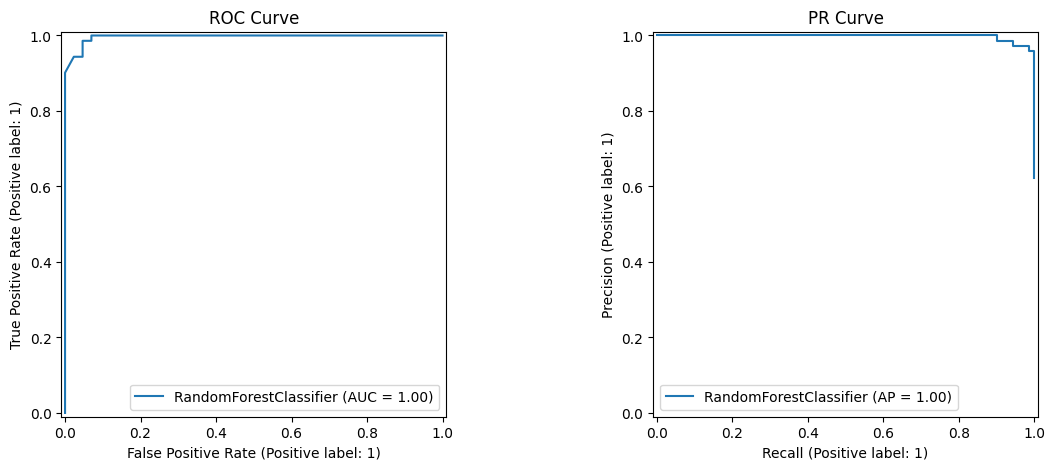

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=ax2)
ax1.set_title("ROC Curve"), ax2.set_title("PR Curve")
plt.show()

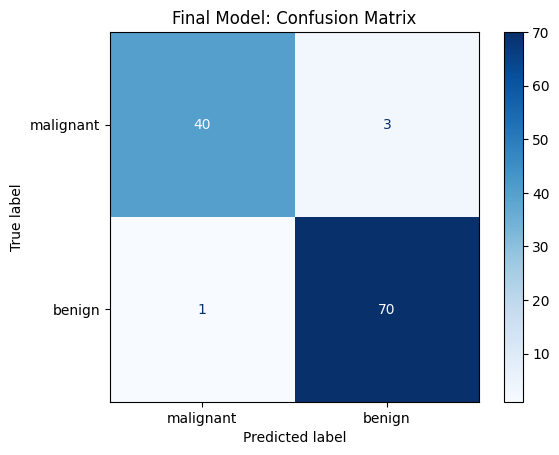

In [9]:
# Confusion Matrix visualization
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues', display_labels=data.target_names)
plt.title("Final Model: Confusion Matrix")
plt.show()

In [10]:
print("-" * 30)
print("Model by: HADIQA KHAN ")
print("-" * 30)

------------------------------
Model by: HADIQA KHAN 
------------------------------
